In [41]:
# impot the python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [42]:
insta=pd.read_csv("instagram.csv")#reading the csv file using pandas
insta.head()#viewing the data from top

,review_description,rating,review_date
0,"The app is good for connecting with friends, f...",3,2023-07-11 23:57:07
1,"Used to be my favorite social media app, but ""...",2,2023-07-22 21:37:09
2,Instagram is the best of all the social media....,5,2023-07-25 03:24:58
3,"I love this app.. but as of late, I have been ...",2,2023-07-09 04:49:57
4,Used to be a great app but there are so many m...,3,2023-07-17 16:47:04


In [43]:
insta.tail()#viewing the data from bottom

,review_description,rating,review_date
210537,I love the app but lately my dms have been mes...,2,2019-03-10 00:40:59
210538,Fun and addictive. Let's me see new ideas for ...,5,2019-09-22 01:12:36
210539,User friendly and all things are available for...,5,2018-10-21 03:16:07
210540,There are issues when you upload a story from ...,1,2020-06-02 17:43:23
210541,This app keeps blocking me from making my acco...,5,2018-09-24 21:31:59


In [44]:
insta.info()#understanding the data-type in each columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210542 entries, 0 to 210541
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_description  210542 non-null  object
 1   rating              210542 non-null  int64 
 2   review_date         210542 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.8+ MB


In [45]:
insta.shape#gives the no of rows and column

(210542, 3)

In [46]:
insta.columns# Display the column name in the dataset

Index(['review_description', 'rating', 'review_date'], dtype='object')

In [47]:
insta.isnull().sum()#adding the null values in each rows

review_description    0
rating                0
review_date           0
dtype: int64

In [48]:
insta.describe()# gives the statistical calculation of the dataset

,rating
count,210542.000000
mean,2.476337
std,1.580380
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


In [49]:
insta.duplicated().sum()#checking the duplicate columns in the dataset

0

Data Cleaning and Data Preprocessing

In [50]:
insta.drop(columns='review_date',inplace=True)#droping the Review date column 

In [51]:
insta.duplicated().sum()

471

In [52]:
insta.drop_duplicates(keep='first',inplace=True)#removing the duplicate values

In [53]:
insta.shape

(210071, 2)

In [54]:
insta.duplicated().sum()

0

In [55]:
insta.head()

,review_description,rating
0,"The app is good for connecting with friends, f...",3
1,"Used to be my favorite social media app, but ""...",2
2,Instagram is the best of all the social media....,5
3,"I love this app.. but as of late, I have been ...",2
4,Used to be a great app but there are so many m...,3


In [56]:
import re
#Creating a function to clean text
def cleantext(text):
    text = re.sub(r"@[0-9a-zA-Z]+", "", text)# Removing mentions   
    text = re.sub(r"#", "", text)# Removing '#' from reviews
    text = re.sub(r"RT[\s]+", "", text)# Removing Retweets
    text = re.sub(r"https?:\\/\\/S+", "", text) # Removing hyperling 
    return text

In [57]:
insta['review_description'] = insta['review_description'].apply(cleantext)#Applying the text cleaning function to 'review_description' column

In [58]:
import re
from textblob import TextBlob
#Creating a function to calculate the sentiments
def calculate_sentiments(ds):
    sentiments = TextBlob(ds['review_description']).sentiment
    return pd.Series([sentiments.subjectivity, sentiments.polarity])

In [59]:
insta[['Subjectivity', 'Polarity']] = insta.apply(calculate_sentiments, axis = 1)#applying the calculate_sentiments function 
insta.head()

,review_description,rating,Subjectivity,Polarity
0,"The app is good for connecting with friends, f...",3,0.444017,0.058547
1,"Used to be my favorite social media app, but ""...",2,0.369259,-0.138148
2,Instagram is the best of all the social media....,5,0.465741,0.310648
3,"I love this app.. but as of late, I have been ...",2,0.462500,0.108594
4,Used to be a great app but there are so many m...,3,0.384307,0.109686


In [60]:
#Creating a function to categorize sentiments based on their Polarity
def categorize_sentiment(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [61]:
insta['Sentiment Analysis'] =insta['Polarity'].apply(categorize_sentiment)#applying categorize_sentiment function
insta.head()

,review_description,rating,Subjectivity,Polarity,Sentiment Analysis
0,"The app is good for connecting with friends, f...",3,0.444017,0.058547,Positive
1,"Used to be my favorite social media app, but ""...",2,0.369259,-0.138148,Negative
2,Instagram is the best of all the social media....,5,0.465741,0.310648,Positive
3,"I love this app.. but as of late, I have been ...",2,0.462500,0.108594,Positive
4,Used to be a great app but there are so many m...,3,0.384307,0.109686,Positive


In [62]:
insta.describe()#gives the statistical analysis

,rating,Subjectivity,Polarity
count,210071.000000,210071.000000,210071.000000
mean,2.472693,0.480924,0.101664
std,1.578385,0.232595,0.312177
min,1.000000,0.000000,-1.000000
25%,1.000000,0.353333,-0.057143
50%,2.000000,0.500000,0.062500
75%,4.000000,0.623016,0.285714
max,5.000000,1.000000,1.000000


In [63]:
insta['review_description'].unique#gives the unique values in review_descriptio column

<bound method Series.unique of 0         The app is good for connecting with friends, f...
1         Used to be my favorite social media app, but "...
2         Instagram is the best of all the social media....
3         I love this app.. but as of late, I have been ...
4         Used to be a great app but there are so many m...
                                ...                        
210537    I love the app but lately my dms have been mes...
210538    Fun and addictive. Let's me see new ideas for ...
210539    User friendly and all things are available for...
210540    There are issues when you upload a story from ...
210541    This app keeps blocking me from making my acco...
Name: review_description, Length: 210071, dtype: object>

In [64]:
insta['rating'].unique

<bound method Series.unique of 0         3
1         2
2         5
3         2
4         3
         ..
210537    2
210538    5
210539    5
210540    1
210541    5
Name: rating, Length: 210071, dtype: int64>

In [65]:
insta['rating'].value_counts()# counts the number of times each unique value appears in the column 

rating
1    93078
5    39660
2    27371
3    26527
4    23435
Name: count, dtype: int64

In [66]:
insta['Subjectivity'].unique

<bound method Series.unique of 0         0.444017
1         0.369259
2         0.465741
3         0.462500
4         0.384307
            ...   
210537    0.516667
210538    0.540909
210539    0.550000
210540    0.000000
210541    0.451852
Name: Subjectivity, Length: 210071, dtype: float64>

In [67]:
insta['Subjectivity'].value_counts()

Subjectivity
0.000000    16027
0.500000     9784
1.000000     5717
0.750000     3826
0.600000     3690
            ...  
0.319949        1
0.342235        1
0.377222        1
0.378274        1
0.390079        1
Name: count, Length: 21216, dtype: int64

In [68]:
insta['Sentiment Analysis'].value_counts()

Sentiment Analysis
Positive    119302
Negative     64797
Neutral      25972
Name: count, dtype: int64

In [69]:
insta['Sentiment Analysis'].unique

<bound method Series.unique of 0         Positive
1         Negative
2         Positive
3         Positive
4         Positive
            ...   
210537    Negative
210538    Positive
210539    Positive
210540     Neutral
210541    Negative
Name: Sentiment Analysis, Length: 210071, dtype: object>

In [70]:
insta['Polarity'].value_counts()

Polarity
 0.000000    25972
 0.500000     5457
 0.250000     2843
-0.250000     2371
 0.200000     2107
             ...  
 0.101250        1
 0.249375        1
-0.489091        1
 0.086667        1
-0.374074        1
Name: count, Length: 32568, dtype: int64

Data Visualization

[Text(0.5, 1.0, 'Density PLot of Subjectivity Column')]

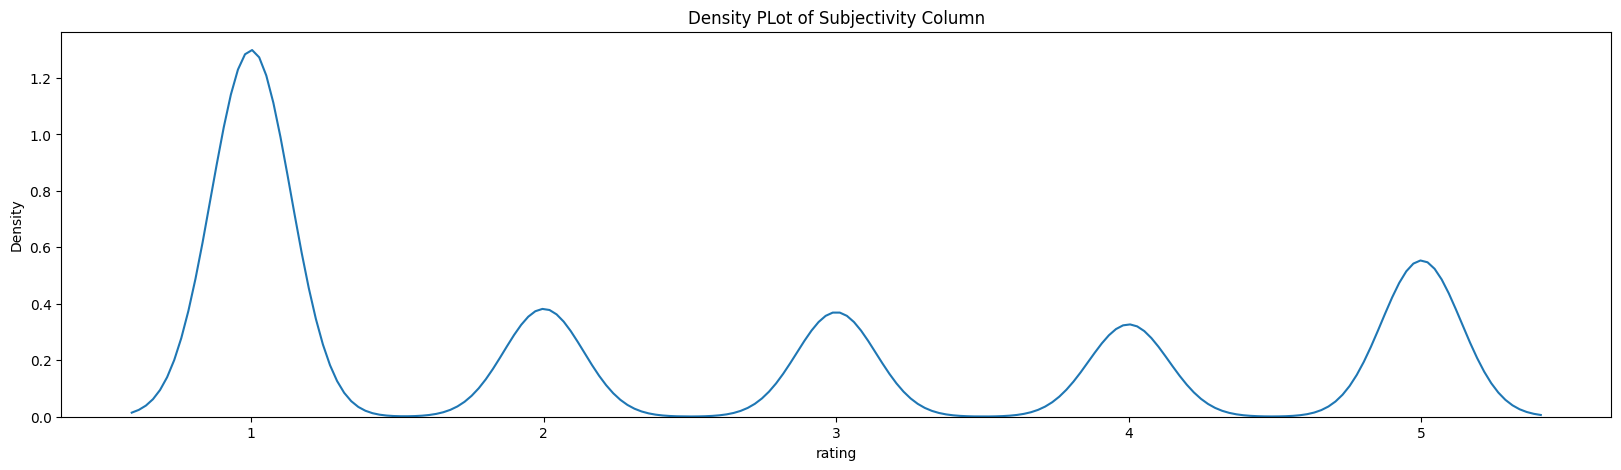

In [71]:
plt.figure(figsize=(20,5))#the size of figure
sns.kdeplot(data=insta['rating']).set(title=("Density PLot of Subjectivity Column"))

[Text(0.5, 1.0, 'Histogram PLot of Subjectivity Column')]

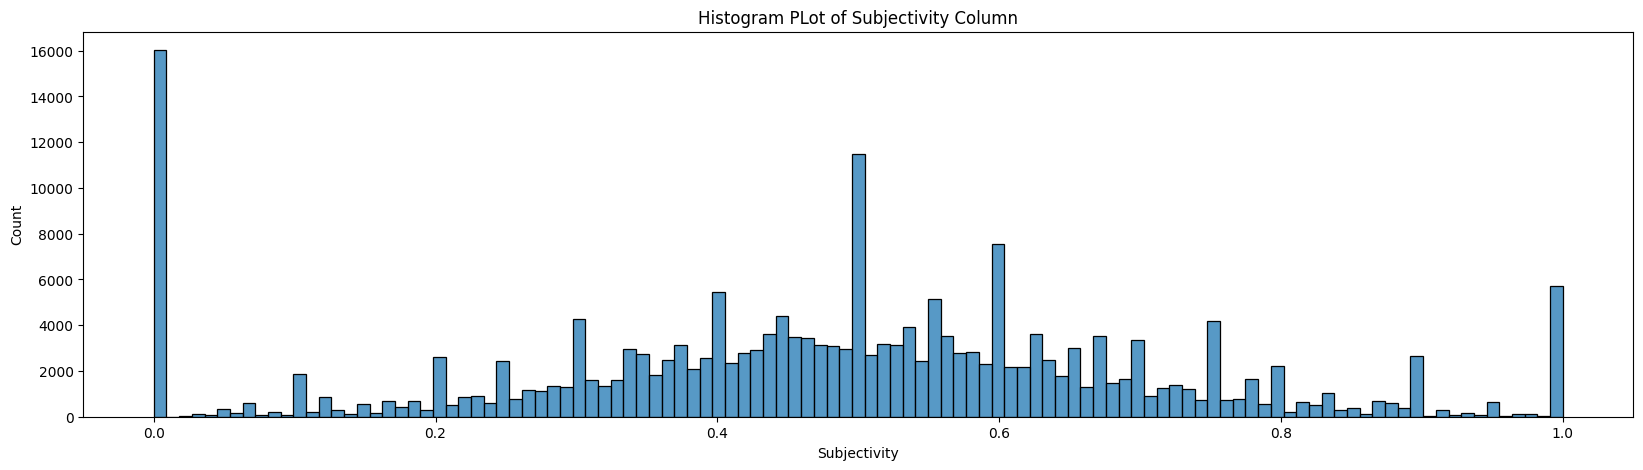

In [72]:
plt.figure(figsize=(20,5))#the size of figure
sns.histplot(data=insta['Subjectivity']).set(title=("Histogram PLot of Subjectivity Column"))

[Text(0.5, 1.0, 'Count PLot of Sentiments Column')]

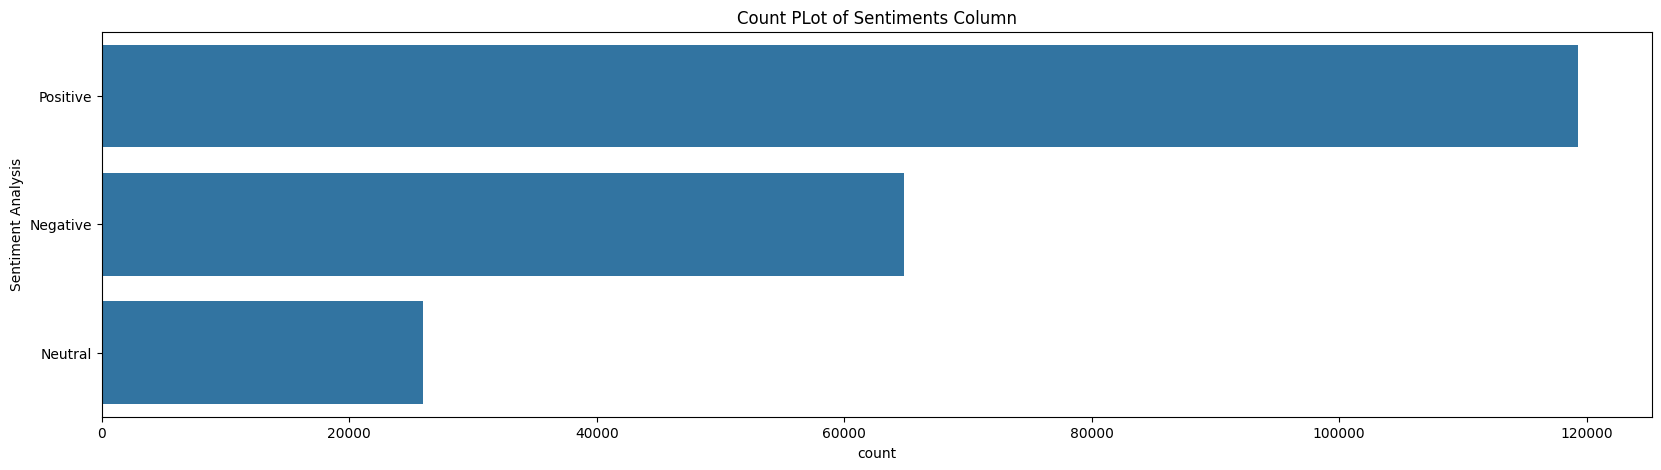

In [73]:
plt.figure(figsize=(20,5))#the size of figure
sns.countplot(data=insta['Sentiment Analysis']).set(title=("Count PLot of Sentiments Column"))


[Text(0.5, 1.0, 'Density PLot of Polarity Column')]

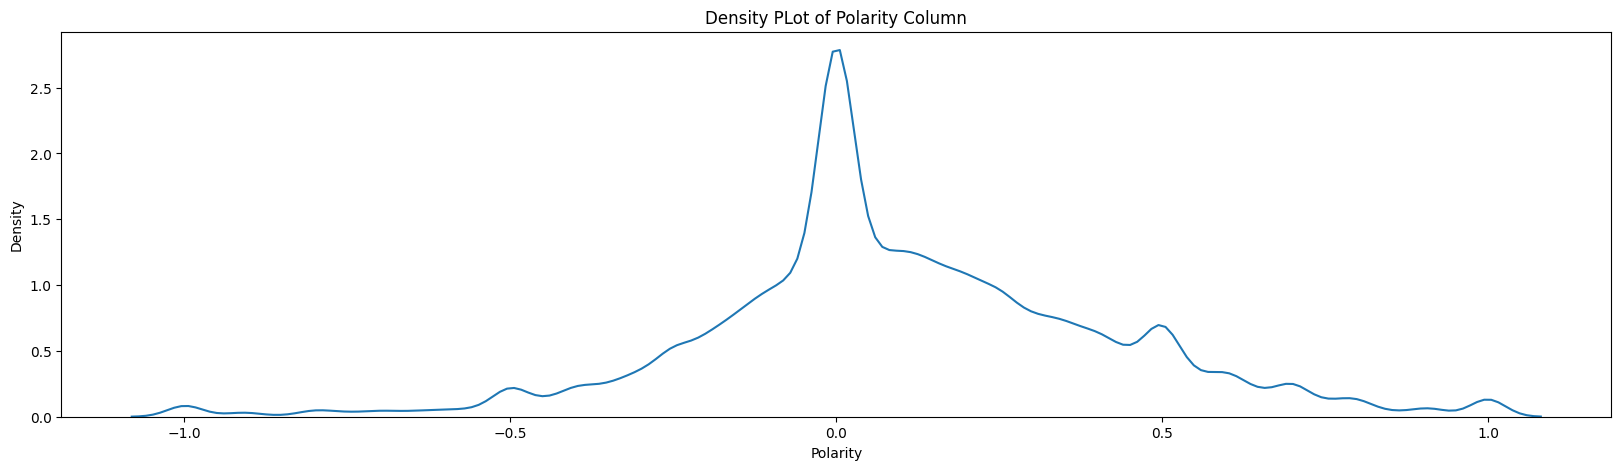

In [74]:
plt.figure(figsize=(20,5))#the size of figure
sns.kdeplot(data=insta['Polarity']).set(title=("Density PLot of Polarity Column"))

Text(0.5, 1.0, 'Whisker Plot presentaion of Polarity')

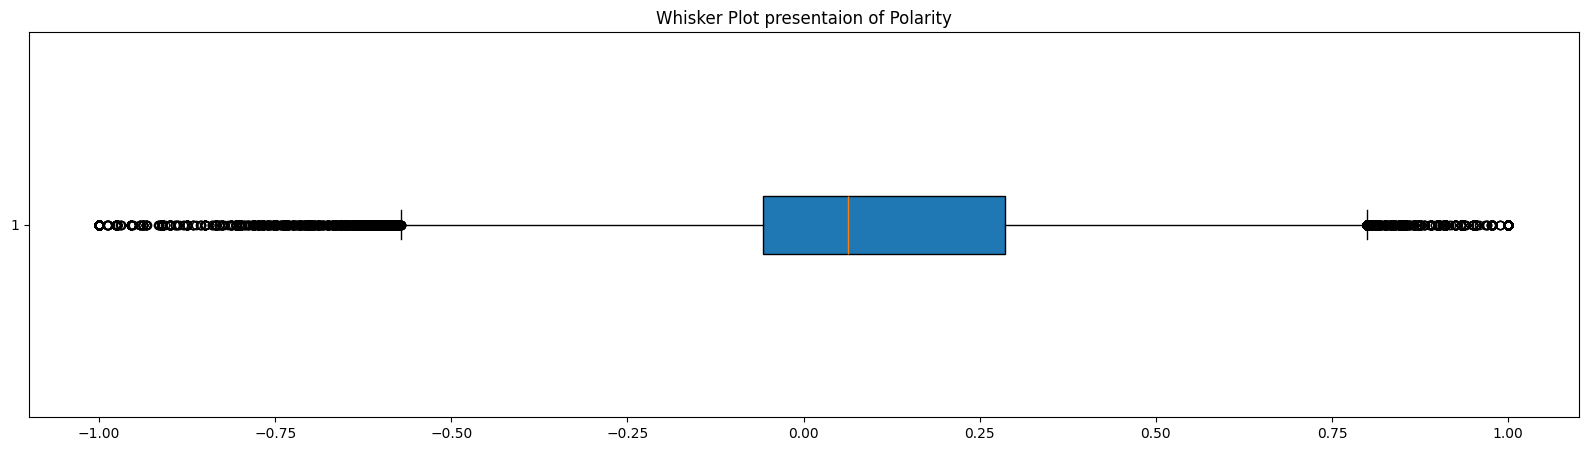

In [75]:
plt.figure(figsize=(20,5))#the size of figure
# Create a box plot using seaborn
plt.boxplot(insta["Polarity"],vert=False,patch_artist=True,)
plt.title('Whisker Plot presentaion of Polarity')

Text(0.5, 1.0, 'Whisker Plot presentaion of column Subjectivity ')

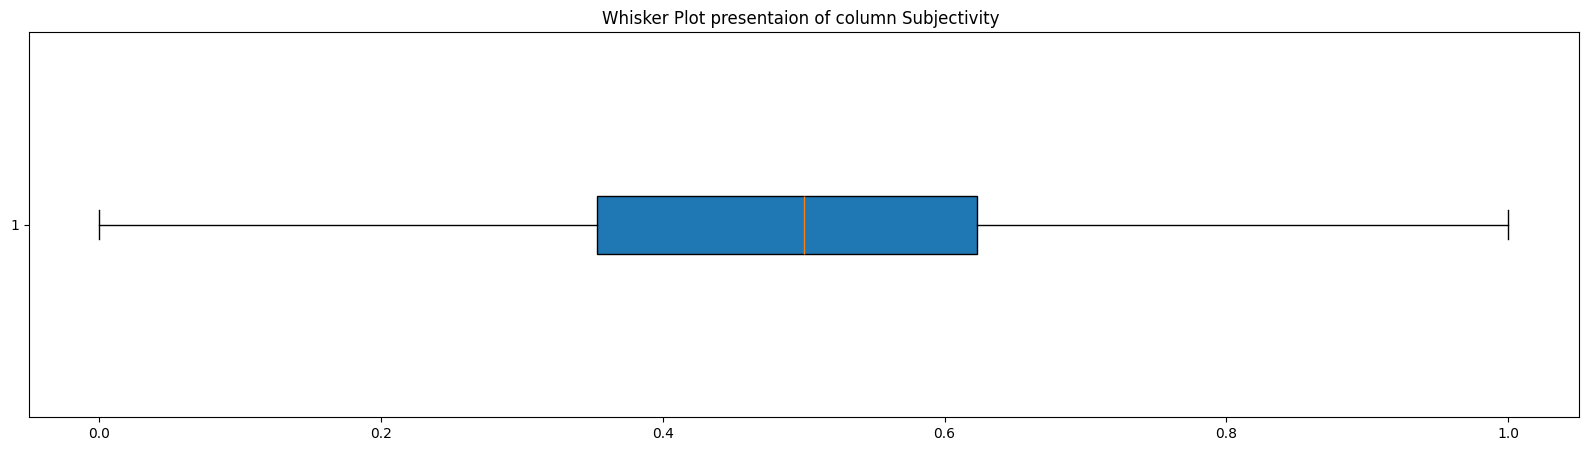

In [76]:
plt.figure(figsize=(20,5))#the size of figure
# Create a box plot using seaborn
plt.boxplot(insta["Subjectivity"],vert=False,patch_artist=True,)
plt.title('Whisker Plot presentaion of column Subjectivity ')

<Figure size 800x800 with 0 Axes>

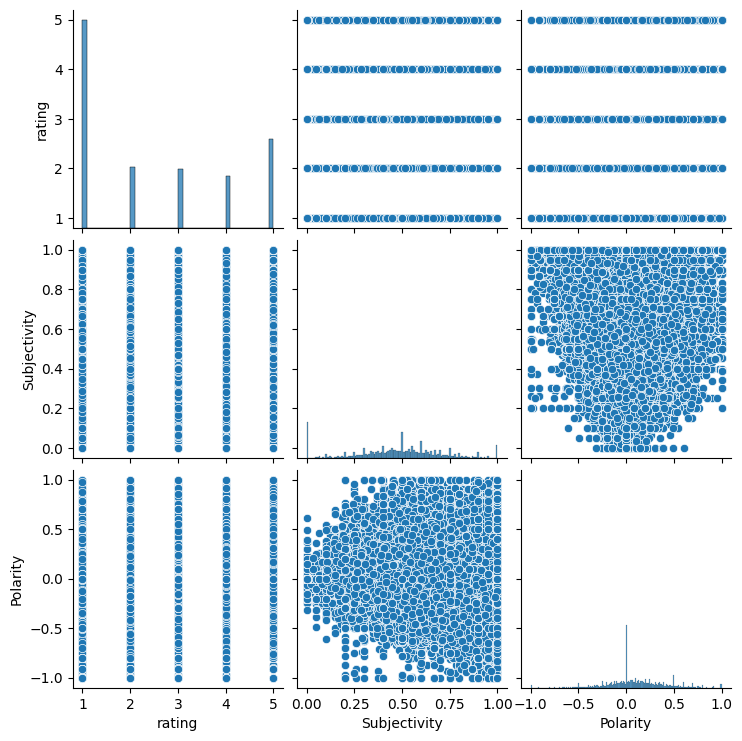

In [77]:
# Create a paiplot using Seaborn
plt.figure(figsize=(8,8))#the size of figure
sns.pairplot(insta)#Generate a pairplot to visualize pairwise relationships
plt.show()# Display the plot

In [79]:
from sklearn.preprocessing import LabelEncoder
#Encoding sentiments into numerical values
le = LabelEncoder()
insta['Sentiment Analysis'] = le.fit_transform(insta['Sentiment Analysis'])

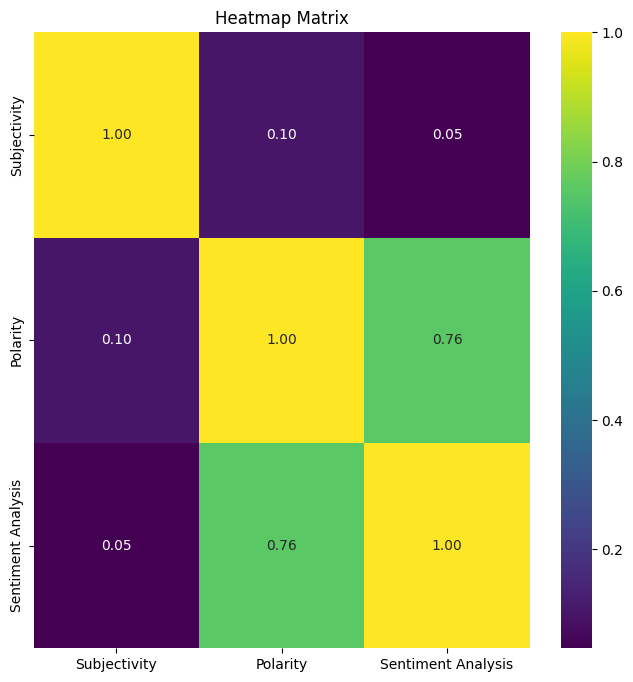

In [80]:
plt.figure(figsize=(8,8))#the size of figure
sns.heatmap(insta.iloc[:, 2:].corr(), # Compute the correlation matrix of the selected columns
            annot=True, #Annotate the heatmap with the correlation coefficients
            cmap='viridis',#Set the colormap to 'viridis
            fmt=".2f" #Format the annotations to two decimal places
            ).set(title='Heatmap Matrix')#Set the title of the heatmap

plt.show()# Display the plot

In [81]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [82]:
# Preprocess the text data
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [83]:
from sklearn.model_selection import train_test_split
X = insta['review_description']
y = insta['Sentiment Analysis']
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size = 0.20, random_state =42,shuffle=True)

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(xtrain)
X_train_counts.shape

(168056, 47215)

In [85]:
X_train_counts

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4846430 stored elements and shape (168056, 47215)>

In [86]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(168056, 47215)

In [87]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4846430 stored elements and shape (168056, 47215)>

In [88]:
# Machine Learning
# Training LogisticRegression classifier on training data.
classifier = LogisticRegression().fit(X_train_tfidf, ytrain)

c:\Users\shaws\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘Vectorizing’ , ‘TFID’ and ‘classifier’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline
#Prepare data for training
the_pipeline = Pipeline([
    ('Vectorizing', CountVectorizer()),
    ('TFID', TfidfTransformer()),
    ('classifier',LogisticRegression())
])
text_clf = the_pipeline.fit(xtrain, ytrain)


c:\Users\shaws\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
text_clf

Pipeline(steps=[('Vectorizing', CountVectorizer()),
                ('TFID', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [91]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(xtrain)
X_test_tfidf = vectorizer.transform(xtest)


In [92]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, ytrain)


LogisticRegression()

In [93]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(ytest, y_pred))
print("Classification Report:\n", classification_report(ytest, y_pred))

Accuracy: 0.8947518743305962
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85     13002
           1       0.86      0.89      0.88      5214
           2       0.91      0.93      0.92     23799

    accuracy                           0.89     42015
   macro avg       0.88      0.88      0.88     42015
weighted avg       0.89      0.89      0.89     42015

